<a href="https://colab.research.google.com/github/AleOi2/PSI3472/blob/master/Aula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 4

In [1]:
#cnn1.py - grad2020
#Testado em TF2 em Colab
import tensorflow.keras as keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten
from keras import optimizers
import numpy as np
import sys
import os
(AX, AY), (QX, QY) = mnist.load_data() # AX [60000,28,28] AY [60000,]
AX=255-AX; QX=255-QX
nclasses = 10
AY2 = keras.utils.to_categorical(AY, nclasses) # 3 -> 0001000000
QY2 = keras.utils.to_categorical(QY, nclasses)
nl, nc = AX.shape[1], AX.shape[2] #28, 28
AX = AX.astype('float32') / 255.0 # 0 a 1
QX = QX.astype('float32') / 255.0 # 0 a 1
AX = np.expand_dims(AX,axis=3) # AX [60000,28,28,1]
QX = np.expand_dims(QX,axis=3)
model = Sequential() # 28x28
model.add(Conv2D(20, kernel_size=(5,5), activation='relu',
 input_shape=(nl, nc, 1) )) #20x24x24
model.add(MaxPooling2D(pool_size=(2,2))) #20x12x12
model.add(Conv2D(40, kernel_size=(5,5), activation='relu')) #40x8x8
model.add(MaxPooling2D(pool_size=(2,2))) #40x4x4
model.add(Flatten()) #640
model.add(Dense(1000, activation='relu')) #1000
model.add(Dense(nclasses, activation='softmax')) #10
from keras.utils import plot_model
plot_model(model, to_file='cnn1.png', show_shapes=True); model.summary()
opt=optimizers.Adam()
model.compile(optimizer=opt,
 loss='categorical_crossentropy',
 metrics=['accuracy'])
model.fit(AX, AY2,
 batch_size=500,
 epochs=30,
 verbose=2)
score = model.evaluate(QX, QY2, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('cnn1.h5') 

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 40)          20040     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 40)          0         
_________________________________________________________________
flatten (Flatten)            (None, 640)               0         
_________________________________________________________________
dense (Dense)                (None, 1000)              641000    
_________________________________________________________

# Exercício 1

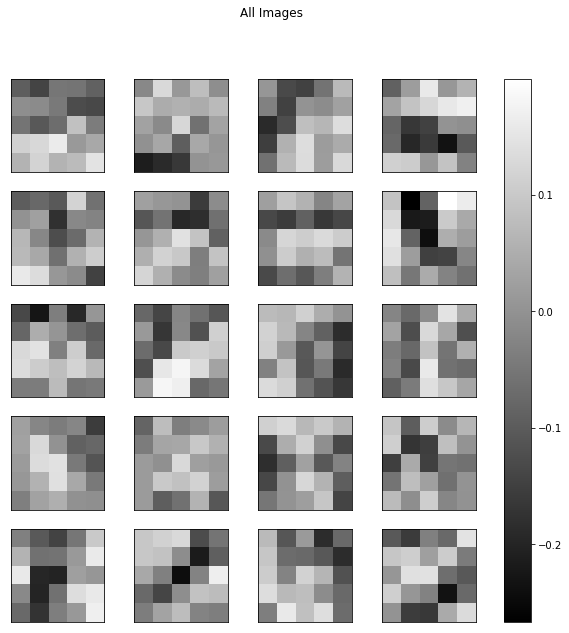

In [3]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

def plotImages(fig, axs):
  images = []
  index = 0 
  for i in range(Nr):
      for j in range(Nc):
          # Generate data with a range that varies from one plot to the next.
          data = filters[:,:,0,index]
          images.append(axs[i, j].imshow(data, cmap = 'gray'))
          axs[i, j].axes.xaxis.set_visible(False)
          axs[i, j].axes.yaxis.set_visible(False)
          fig.set_figheight(10)
          fig.set_figwidth(10)
          index = index + 1

  # Find the min and max of all colors for use in setting the color scale.
  vmin = min(image.get_array().min() for image in images)
  vmax = max(image.get_array().max() for image in images)
  norm = colors.Normalize(vmin=vmin, vmax=vmax)
  for im in images:
      im.set_norm(norm)
  fig.colorbar(images[0], ax=axs, orientation='vertical', fraction=.1)

def genFilterBiases():
  model=keras.models.load_model("cnn1.h5")
  for layer in model.layers:
    if layer.name=="conv2d":
      return layer.get_weights()       
Nr = 5
Nc = 4
(filters, biases) = genFilterBiases()
fig, axs = plt.subplots(Nr, Nc)
fig.suptitle('All Images')
plotImages(fig, axs)
plt.show()




# Exercício 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


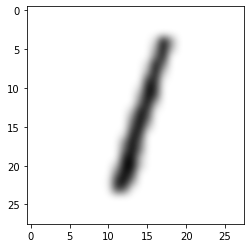

Predicted Response


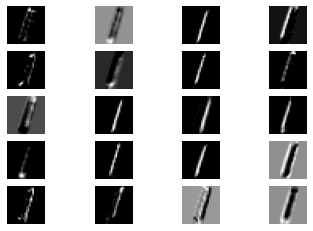

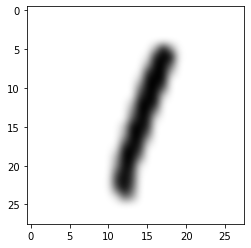

Predicted Response


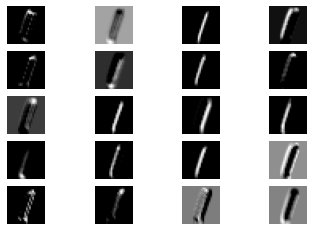

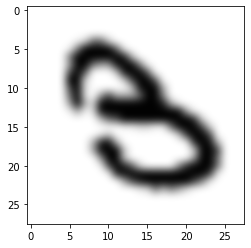

Predicted Response


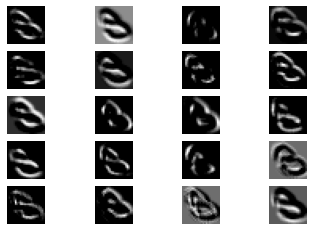

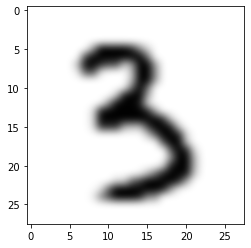

Predicted Response


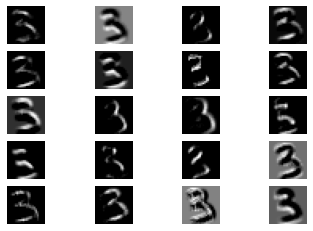

In [ ]:
from google.colab import drive
import sys
import os
import cv2

def Exerecice(nome):
  nome_arquivo = "/content/drive/My Drive/Colab Notebooks/psi3472/Aula4/Imagens/" + nome
  imagem = cv2.imread(nome_arquivo, 1)
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
  plt.imshow(imagem, interpolation="bicubic", cmap="gray")
  plt.show()
  layer_name = 'conv2d_2'
  intermediate_layer_model = keras.Model(inputs=model.input,
  outputs=model.get_layer(layer_name).output)

  def printImage(prediction, numrow, numcol):
    from matplotlib import pyplot as plt
    f = plt.figure()
    print("Predicted Response")
    xDimension = prediction.shape[1]
    yDimension = prediction.shape[2]
    imgNum = prediction.shape[3]

    for index in range(0, imgNum):
      f.add_subplot(numrow,numcol,index + 1)
      img = prediction[0,:,:,index]
      plt.imshow(img, cmap="gray")
      plt.axis('off')
    plt.show()

  x = np.array([imagem])
  prediction = intermediate_layer_model.predict(x)       # 1x24x24x20
  printImage(prediction, 5, 4)

drive.mount('/content/drive')
Exerecice("at_1_002_dig.png")
Exerecice("at_1_005_dig.png")
Exerecice("at_3_018_dig.png")
Exerecice("at_3_032_dig.png")


